In [1]:
print("Date : 29 December, 2020")

Date : 29 December, 2020


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Source : https://www.tensorflow.org/tutorials/images/cnn


In [3]:
from keras.datasets import mnist
from PIL import Image
# for creating a one hot vector for labels
from keras.utils import np_utils
from IPython.display import display, Image
#import the models
from keras import Model
#add layers
from keras import layers
#add optimizer
from keras import optimizers
#add loss function 
from keras import losses

import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
 

4614
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4614   4614
skip


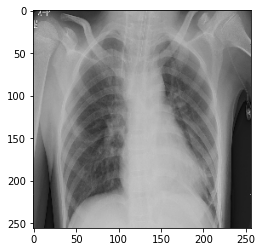

In [4]:
tr_covid = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/train/COVID19"
tr_covid_list = os.listdir(tr_covid)
x_train = []
label = []
print(len(tr_covid_list))

for i in range( 0, len(tr_covid_list)):
    if i % 100 == 0:
       print(i)
    link = tr_covid+'/'+ tr_covid_list[i]
    img = cv2.imread(link)
    image = cv2.resize(img, (256, 256))
    x_train.append(image)
    #print(gray_image)
    label.append([0])
print(len(x_train)," ", len(label))
plt.imshow(image)

print("skip")

108
0
100
4722   4722
skip


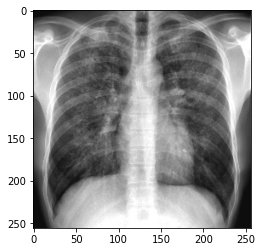

In [5]:

valid_covid = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/validation/COVID19"
valid_covid_list = os.listdir(valid_covid)

print(len(valid_covid_list))
for i in range( 0, len(valid_covid_list)):
    if i % 100 == 0:
       print(i)
    link = valid_covid+'/'+ valid_covid_list[i]
    img = cv2.imread(link)
    image = cv2.resize(img, (256 , 256 ))
    x_train.append(image)
    #print(gray_image)
    label.append([0])

plt.imshow(image)
print(len(x_train)," ", len(label))
print("skip")

4633
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
9355   9355
skip


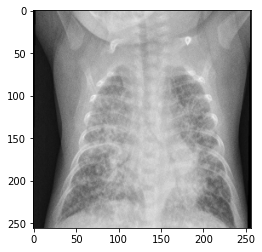

In [6]:
tr_pneumonia = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/train/PNEUMONIA"
tr_pneumonia_list = os.listdir(tr_pneumonia)


print(len(tr_pneumonia_list))

for i in range( 0, len(tr_pneumonia_list)):
    if i % 100 == 0:
       print(i)
    link = tr_pneumonia+'/'+ tr_pneumonia_list[i]
    img = cv2.imread(link)
    image = cv2.resize(img, (256 , 256 ))
    x_train.append(image)
    #print(gray_image)
    label.append([1])
print(len(x_train)," ", len(label))
plt.imshow(image)

print("skip")

110
0
100
9465   9465
skip


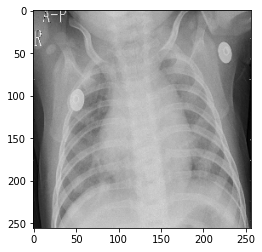

In [7]:

valid_pneumonia = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/validation/PNEUMONIA"
valid_pneumonia_list = os.listdir(valid_pneumonia)

print(len(valid_pneumonia_list))
for i in range( 0, len(valid_pneumonia_list)):
    if i % 100 == 0:
       print(i)
    link = valid_pneumonia+'/'+ valid_pneumonia_list[i]
    img = cv2.imread(link)
    image = cv2.resize(img, (256 , 256 ))
    x_train.append(image)
    #print(gray_image)
    label.append([1])

plt.imshow(image)
print(len(x_train)," ", len(label))
print("skip")

4519
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
13984   13984
skip


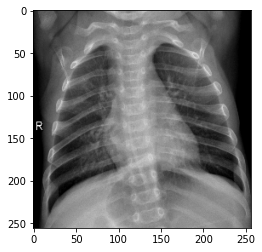

In [8]:
tr_normal = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/train/NORMAL"
tr_normal_list = os.listdir(tr_normal)


print(len(tr_normal_list))

for i in range( 0, len(tr_normal_list)):
    if i % 100 == 0:
       print(i)
    link = tr_normal+'/'+ tr_normal_list[i]
    img = cv2.imread(link)
    image = cv2.resize(img, (256 , 256 ))
    x_train.append(image)
    #print(gray_image)
    label.append([2])
print(len(x_train)," ", len(label))
plt.imshow(image)

print("skip")

110
0
100
14094   14094
skip


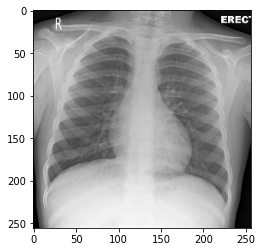

In [9]:

valid_normal = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/validation/NORMAL"
valid_normal_list = os.listdir(valid_normal)

print(len(valid_normal_list))
for i in range( 0, len(valid_normal_list)):
    if i % 100 == 0:
       print(i)
    link = valid_normal+'/'+ valid_normal_list[i]
    img = cv2.imread(link)
    image = cv2.resize(img, (256, 256))
    x_train.append(image)
    #print(gray_image)
    label.append([2])

plt.imshow(image)
print(len(x_train)," ", len(label))
print("skip")

In [10]:
label = np.array(label)
x_train = np.array(x_train)

In [11]:
model = Sequential()
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(256 , 256 , 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
Total params: 78,720
Trainable params: 78,720
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 64)      4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
print(label)
print(len(label))
print(len(x_train))


[[0]
 [0]
 [0]
 ...
 [2]
 [2]
 [2]]
14094
14094


In [15]:
network_history = model.fit( x_train ,  label ,epochs= 50 , validation_split= 0.1 )

Epoch 1/50
397/397 [==============================] - 39s 79ms/step - loss: 52.9543 - accuracy: 0.5721 - val_loss: 1.1236 - val_accuracy: 0.5426
Epoch 2/50
397/397 [==============================] - 30s 77ms/step - loss: 1.0132 - accuracy: 0.5761 - val_loss: 0.9966 - val_accuracy: 0.6709
Epoch 3/50
397/397 [==============================] - 30s 77ms/step - loss: 0.8079 - accuracy: 0.6148 - val_loss: 0.9599 - val_accuracy: 0.7206
Epoch 4/50
397/397 [==============================] - 31s 77ms/step - loss: 0.6913 - accuracy: 0.6781 - val_loss: 0.9786 - val_accuracy: 0.7270
Epoch 5/50
397/397 [==============================] - 31s 78ms/step - loss: 0.6142 - accuracy: 0.7367 - val_loss: 1.2177 - val_accuracy: 0.7199
Epoch 6/50
397/397 [==============================] - 31s 79ms/step - loss: 0.6236 - accuracy: 0.7307 - val_loss: 1.1484 - val_accuracy: 0.7468
Epoch 7/50
397/397 [==============================] - 31s 79ms/step - loss: 0.5588 - accuracy: 0.7563 - val_loss: 1.3964 - val_accuracy

In [16]:
p = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/validation/COVID19"

test_data = []
p_covid = os.listdir(p)
#print(p_cats)
for i in range (0, len(p_covid)):
   link = p+'/'+p_covid[i]
   img = cv2.imread(link)
   img = cv2.resize(img, (256 ,  256 ))
#plt.imshow(img)
   test_data.append(img)


test_data_covid = np.array(test_data)
#test = test / 255.0
prediction_covid =  model.predict_classes(test_data_covid)
n = 0
for i in range(0, len(prediction_covid)):
    if prediction_covid[i] == 1 or prediction_covid[i] == 2:
       print(i," ", prediction_covid[i])
       n = n+ 1

print("n = ", n)


5   1
17   1
22   1
39   1
100   2
n =  5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [17]:
p = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/validation/PNEUMONIA"

test_data = []
p_pneumonia = os.listdir(p)
#print(p_cats)
for i in range (0, len(p_pneumonia)):
   link = p+'/'+p_pneumonia[i]
   img = cv2.imread(link)
   img = cv2.resize(img , (256 , 256 ))
#plt.imshow(img)
   test_data.append(img)


test_data_pneumonia = np.array(test_data)
#test = test / 255.0
prediction_pneumonia = model.predict_classes(test_data_pneumonia)
n = 0
for i in range(0, len(prediction_pneumonia)):
    if prediction_pneumonia[i] == 0 or prediction_pneumonia[i] == 2:
       print(i," ", prediction_pneumonia[i])
       n = n+ 1

print("n = ", n)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


56   0
58   0
n =  2


In [18]:
p = "/content/drive/MyDrive/datasets/3_December_dataSet_1_step/validation/NORMAL"

test_data = []
p_normal = os.listdir(p)
#print(p_cats)
for i in range (0, len(p_normal)):
   link = p+'/'+p_normal[i]
   img = cv2.imread(link)
   img = cv2.resize(img, ( 256 ,  256 ))
#plt.imshow(img)
   test_data.append(img)


test_data_normal = np.array(test_data)
#test = test / 255.0
prediction_normal = model.predict_classes(test_data_normal )
n = 0
for i in range(0, len(prediction_normal)):
    if prediction_normal[i] == 0 or prediction_normal[i] == 1:
       print(i," ", prediction_normal[i])
       n = n+ 1

print("n = ", n)


n =  0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
